In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
cleanest= pd.read_pickle('final.pkl')

In [3]:
cleanest.head()

,PriceIn2018,PriceIn2017,PriceIn2016,PriceIn2015,PriceIn2014,PriceIn2013,PriceIn2011,PriceIn2012,PriceIn2010,PriceIn2009,...,Car Storage Sq Ft #1,Deck Sq Ft,Pool Sq Ft,Upper Floor Sq Ft,Finished Attic Sq Ft,Unfinished Basement Floor Sq Ft,Patio Sq Ft,Car Storage Sq Ft #2,Porch Sq Ft,Price
Parcel,,,,,,,,,,,,,,,,,,,,,
R8394770330,2521100.0,2471600.0,2385500.0,2138300.0,2138200.0,2056400.0,1811200.0,1983800.0,1741300.0,1269300.0,...,821.0,89.0,128.0,702.0,437.0,1144.0,1234.0,700.0,483.0,2595200.0
R8394770010,377300.0,322400.0,304800.0,286900.0,154400.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,487.0,0.0,0.0,435.0,0.0,0.0,138.0,0.0,131.0,431800.0
R8394770030,309800.0,265600.0,250600.0,235000.0,158800.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,400.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,0.0,355900.0
R8394770050,352800.0,301500.0,284500.0,267900.0,99400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,489.0,30.0,0.0,577.0,0.0,0.0,184.0,0.0,59.0,403900.0
R8394770090,352600.0,301400.0,284400.0,267700.0,59400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,418.0,0.0,0.0,392.0,0.0,0.0,259.0,0.0,0.0,403700.0


In [4]:
x= cleanest.iloc[:,0:60]

In [5]:
x.head()

,PriceIn2018,PriceIn2017,PriceIn2016,PriceIn2015,PriceIn2014,PriceIn2013,PriceIn2011,PriceIn2012,PriceIn2010,PriceIn2009,...,Number of Bathrooms,Car Storage Sq Ft #1,Deck Sq Ft,Pool Sq Ft,Upper Floor Sq Ft,Finished Attic Sq Ft,Unfinished Basement Floor Sq Ft,Patio Sq Ft,Car Storage Sq Ft #2,Porch Sq Ft
Parcel,,,,,,,,,,,,,,,,,,,,,
R8394770330,2521100.0,2471600.0,2385500.0,2138300.0,2138200.0,2056400.0,1811200.0,1983800.0,1741300.0,1269300.0,...,2.25,821.0,89.0,128.0,702.0,437.0,1144.0,1234.0,700.0,483.0
R8394770010,377300.0,322400.0,304800.0,286900.0,154400.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,2.50,487.0,0.0,0.0,435.0,0.0,0.0,138.0,0.0,131.0
R8394770030,309800.0,265600.0,250600.0,235000.0,158800.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,2.00,400.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,0.0
R8394770050,352800.0,301500.0,284500.0,267900.0,99400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,2.50,489.0,30.0,0.0,577.0,0.0,0.0,184.0,0.0,59.0
R8394770090,352600.0,301400.0,284400.0,267700.0,59400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,2.50,418.0,0.0,0.0,392.0,0.0,0.0,259.0,0.0,0.0


In [6]:
y= cleanest.iloc[:,-1]
y.head()

Parcel
R8394770330    2595200.0
R8394770010     431800.0
R8394770030     355900.0
R8394770050     403900.0
R8394770090     403700.0
Name: Price, dtype: float64

### Importing necessary libraries

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Performing Principal Component Analysis

In [17]:
cols= []
for i in range(30):
    cols.append('Component_'+str(i))
pca= PCA(n_components= 30)
components= pca.fit_transform(x)
principalFinal= pd.DataFrame(data= components, columns= cols)

### Checking the correlations

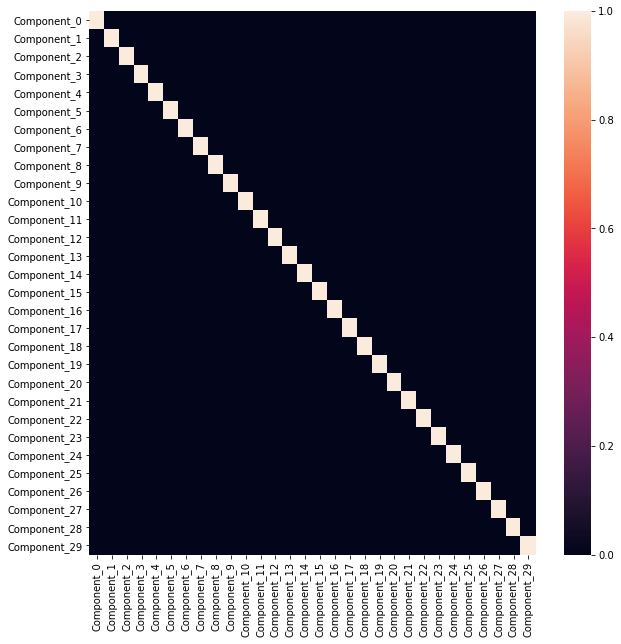

In [39]:
corr= principalFinal.corr()
figure(figsize= (10,10))
sns.heatmap(corr)

### Splitting Datasets into train and test

In [18]:
x_train, x_test, y_train, y_test= train_test_split(principalFinal,
                                                   y,
                                                  test_size= 0.20,
                                                  random_state=42)

## Training a random forest model

In [31]:
rfr= RandomForestRegressor(max_depth=50,
                          n_estimators= 60)

In [32]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
pred_y= rfr.predict(x_test)

## Evaluation

In [34]:
print('RMSE:', round(math.sqrt(mean_squared_error(pred_y, y_test)),2))

RMSE: 329601.85


In [35]:
print('R2 score:', r2_score(pred_y, y_test))

R2 score: 0.8991327292829916
